In [4]:
setwd('/import/DB/workdir/')

In [5]:
library(Seurat)

In [6]:
sce = readRDS('./after_rename.rds')

In [7]:
Idents(sce) = 'orig.ident'

In [8]:
table(sce$orig.ident)


 KO3d  KO7d  MI3d  MI7d 
 5615  9251 11199 14819 

In [32]:
scrna = subset(sce,idents = c('MI7d','KO7d'))

In [33]:
library(Matrix)

In [34]:
Idents(scrna) = 'celltype'

In [35]:
library(ggplot2)

In [36]:
library(Seurat)

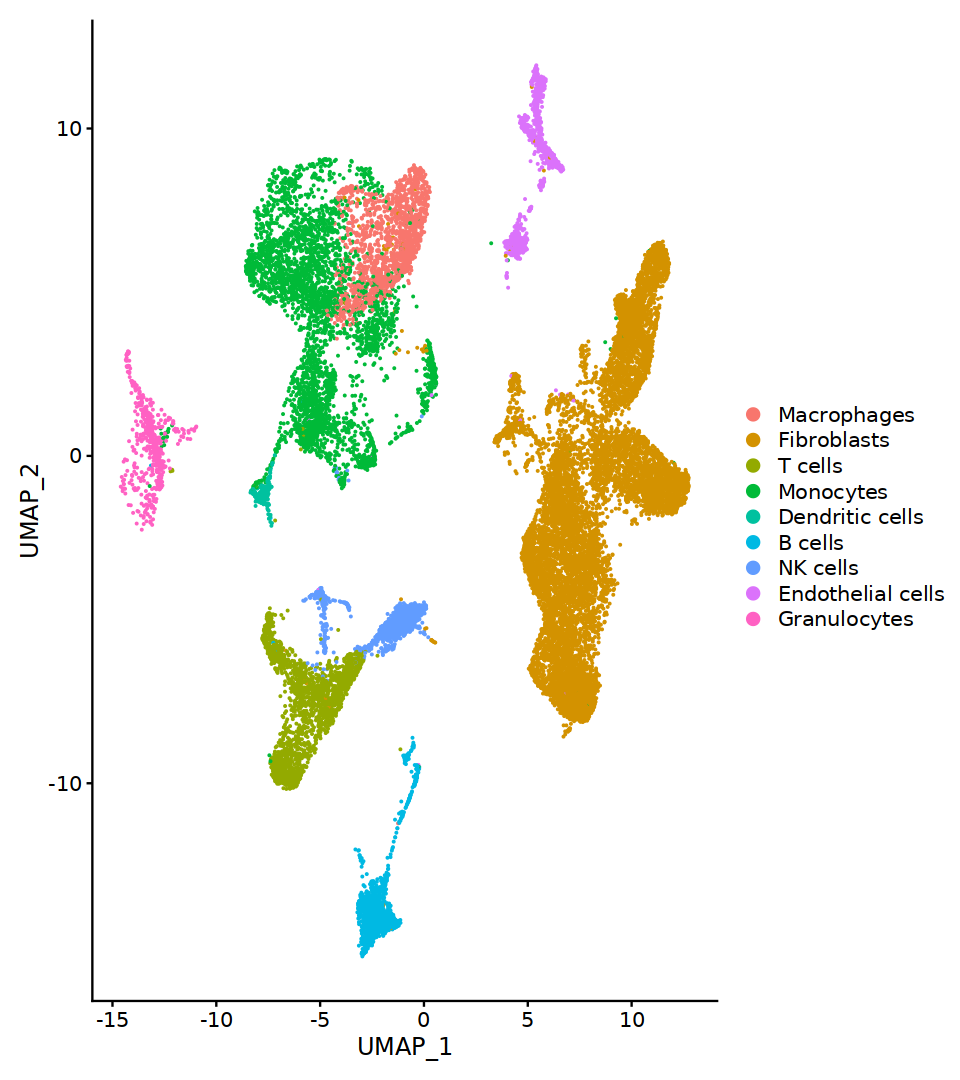

In [37]:
DimPlot(scrna)

In [38]:
scRNA = scrna

In [39]:
Idents(scRNA) = 'celltype'
myeloid = subset(scRNA, idents= c('Macrophages','Monocytes'))

In [74]:
table(myeloid$celltype)


Macrophages   Monocytes 
       1622        3848 

In [41]:
immune.combined = myeloid

In [42]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 10, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:10)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.3)


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6610 anchors

Filtering anchors

	Retained 4676 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5470
Number of edges: 177416

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 10
Elapsed time: 0 seconds


In [43]:
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:10)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:10)
immune.combined = testAB.integrated

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
12:12:07 UMAP embedding parameters a = 0.9922 b = 1.112

12:12:07 Read 5470 rows and found 10 numeric columns

12:12:07 Using Annoy for neighbor search, n_neighbors = 30

12:12:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:12:07 Writing NN index file to temp file /tmp/RtmpvcUBXl/file47504430c452

12:12:07 Searching Annoy index using 1 thread, search_k = 3000

12:12:09 Annoy recall = 100%

12:12:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [54]:
DefaultAssay(immune.combined)='RNA'

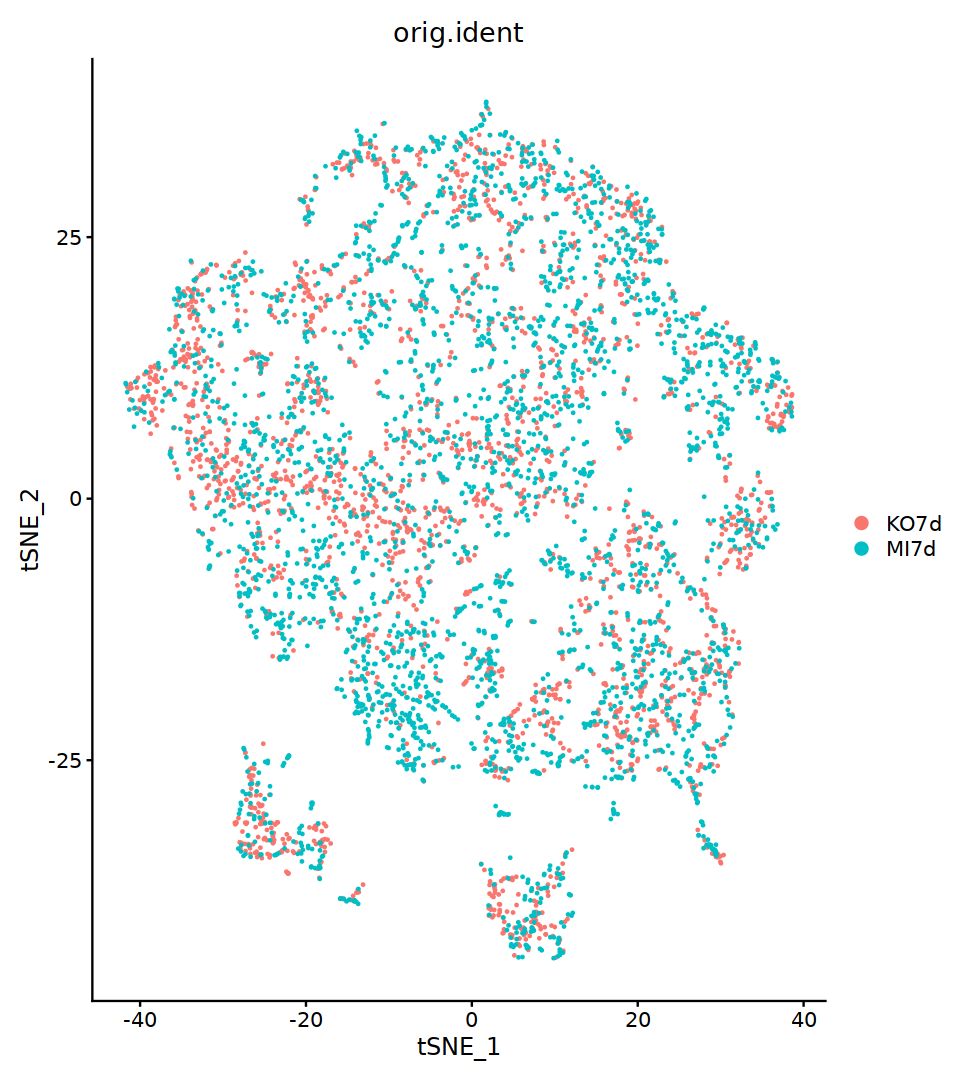

In [62]:
DimPlot(immune.combined, reduction = "tsne", group.by = "orig.ident")

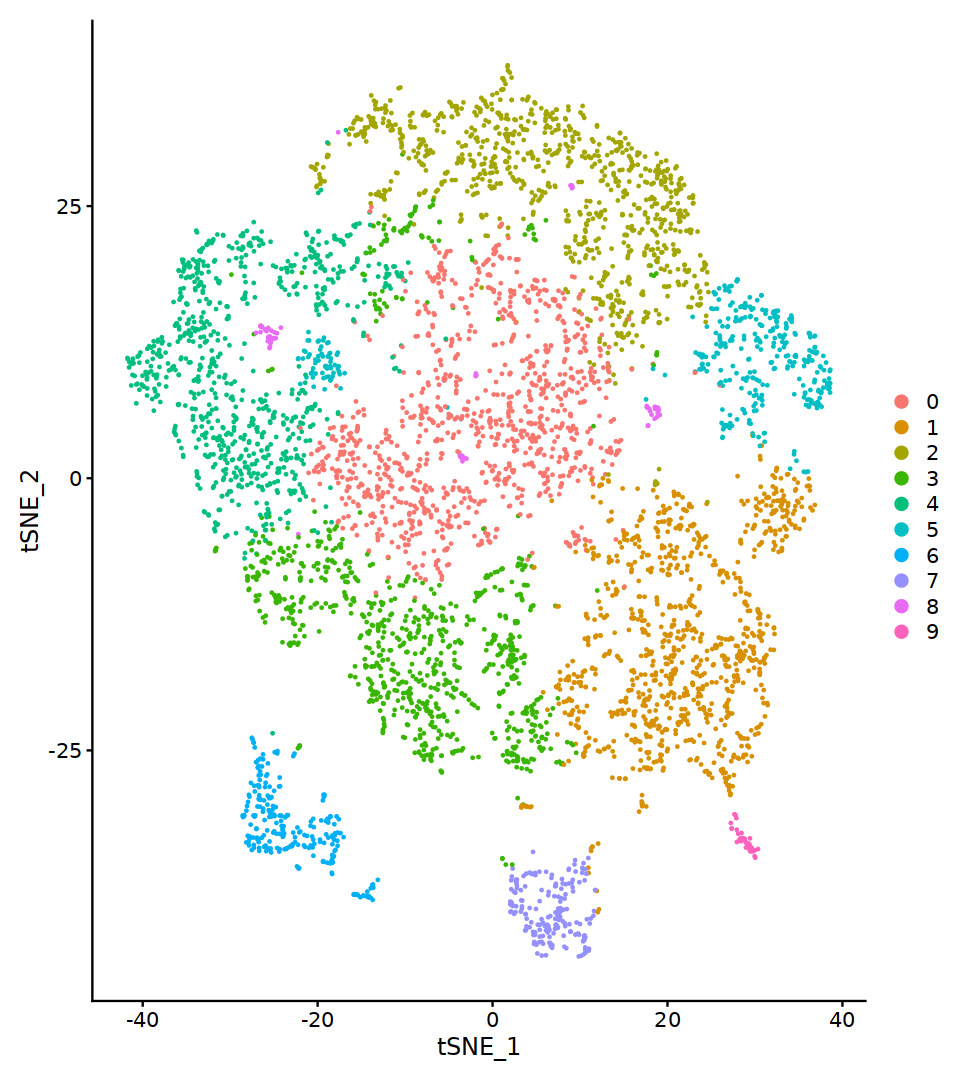

In [63]:
DimPlot(immune.combined, reduction = "tsne")

In [64]:
table(immune.combined$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9 
1042  965  895  875  790  368  241  185   64   45 

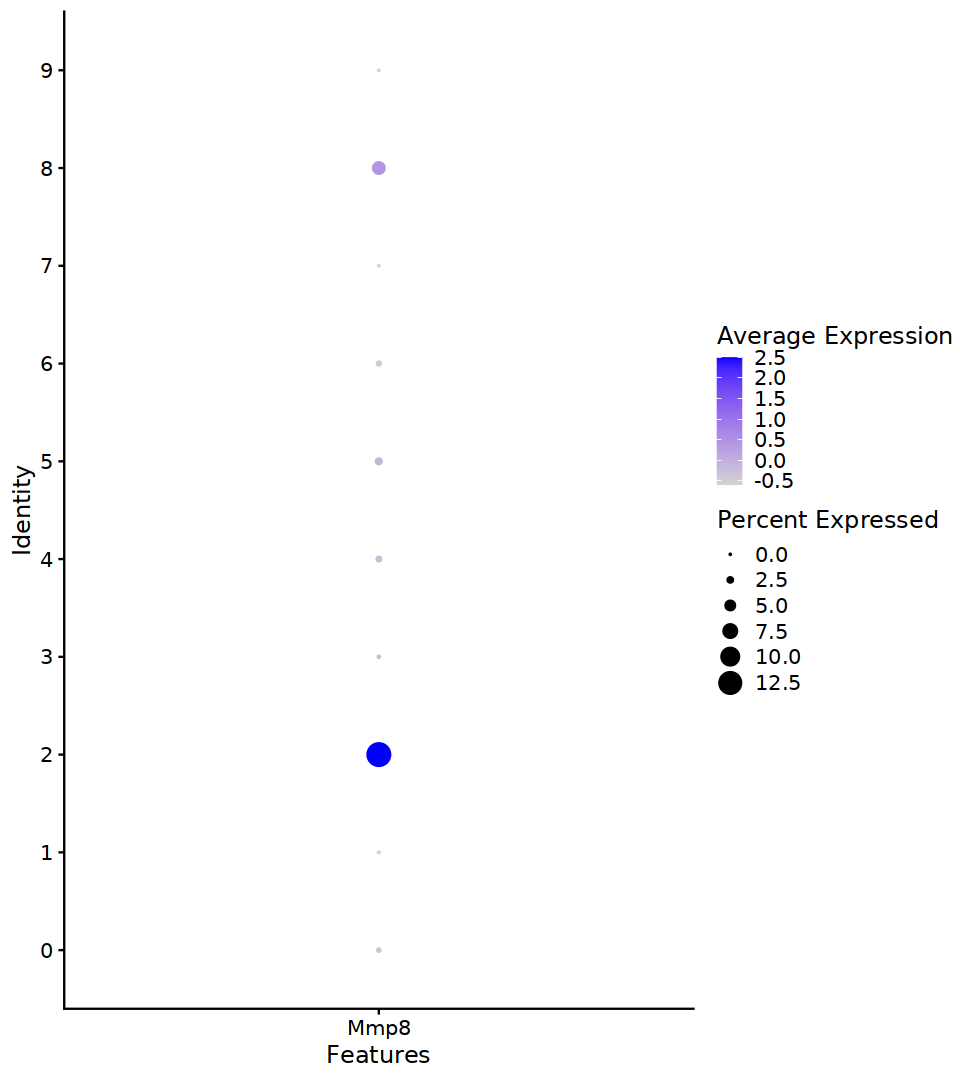

In [73]:
DotPlot(immune.combined, features = 'Mmp8',group.by = 'seurat_clusters')

In [20]:
Idents(immune.combined) = 'seurat_clusters'

In [21]:
immune.combined$celltype = paste0('C',immune.combined$seurat_clusters)

In [22]:
Idents(immune.combined) = 'celltype'

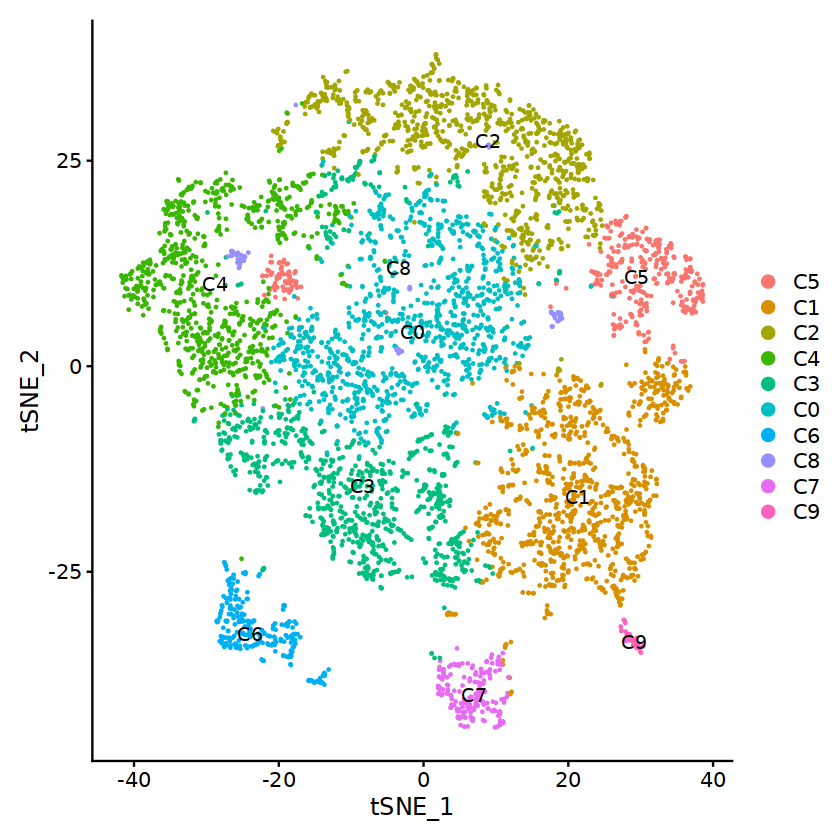

In [23]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [24]:
scRNA= immune.combined


KO7d MI7d 
2505 2965 


         C5          C1          C2          C4          C3          C0 
0.067276051 0.176416819 0.163619744 0.144424132 0.159963437 0.190493601 
         C6          C8          C7          C9 
0.044058501 0.011700183 0.033820841 0.008226691 

    
     KO7d MI7d
  C5  141  227
  C1  478  487
  C2  383  512
  C4  461  329
  C3  233  642
  C0  506  536
  C6  142   99
  C8   37   27
  C7  104   81
  C9   20   25

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




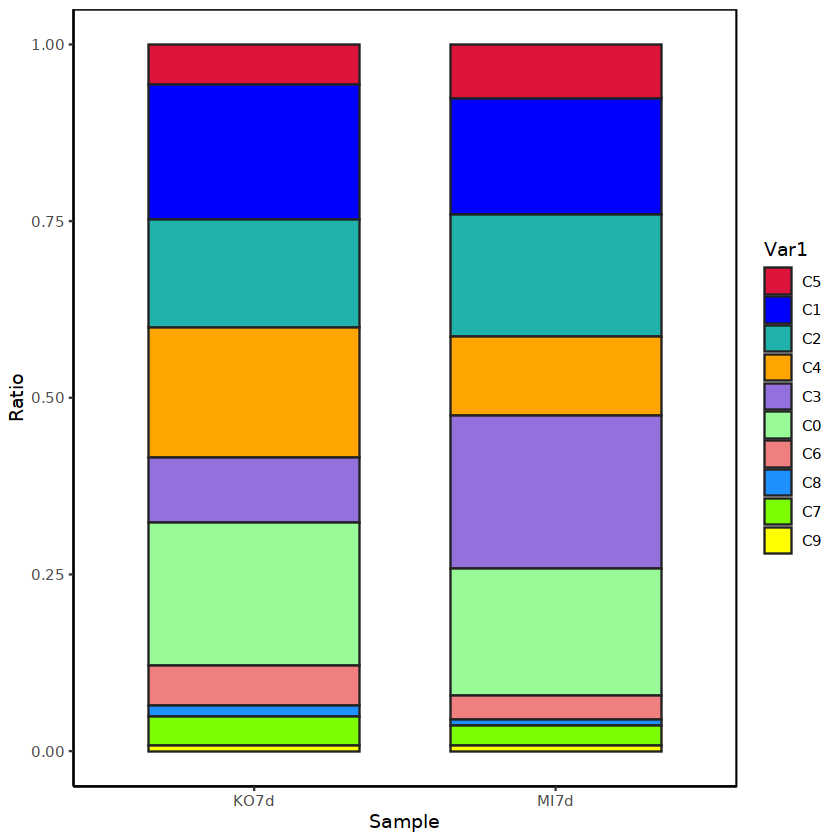

In [25]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'MI3d', 'KO7d', 'MI7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

In [26]:
library(ggplot2)

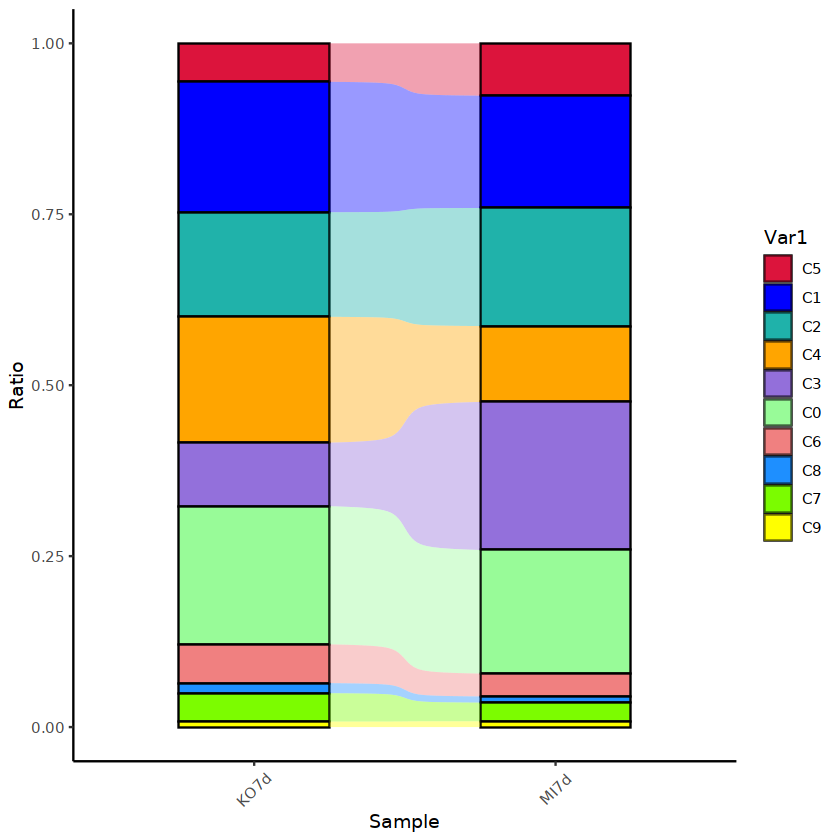

In [27]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [28]:
ggsave('figure.myl.pdf',height =  5,width = 4)

In [29]:
Idents(immune.combined) = 'celltype'

sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

write.csv(sce.markers,file = 'sce.markers.myleoid.csv')

Calculating cluster C5

Calculating cluster C1

Calculating cluster C2

Calculating cluster C4

Calculating cluster C3

Calculating cluster C0

Calculating cluster C6

Calculating cluster C8

Calculating cluster C7

Calculating cluster C9



In [30]:
options(repr.plot.width = 12)

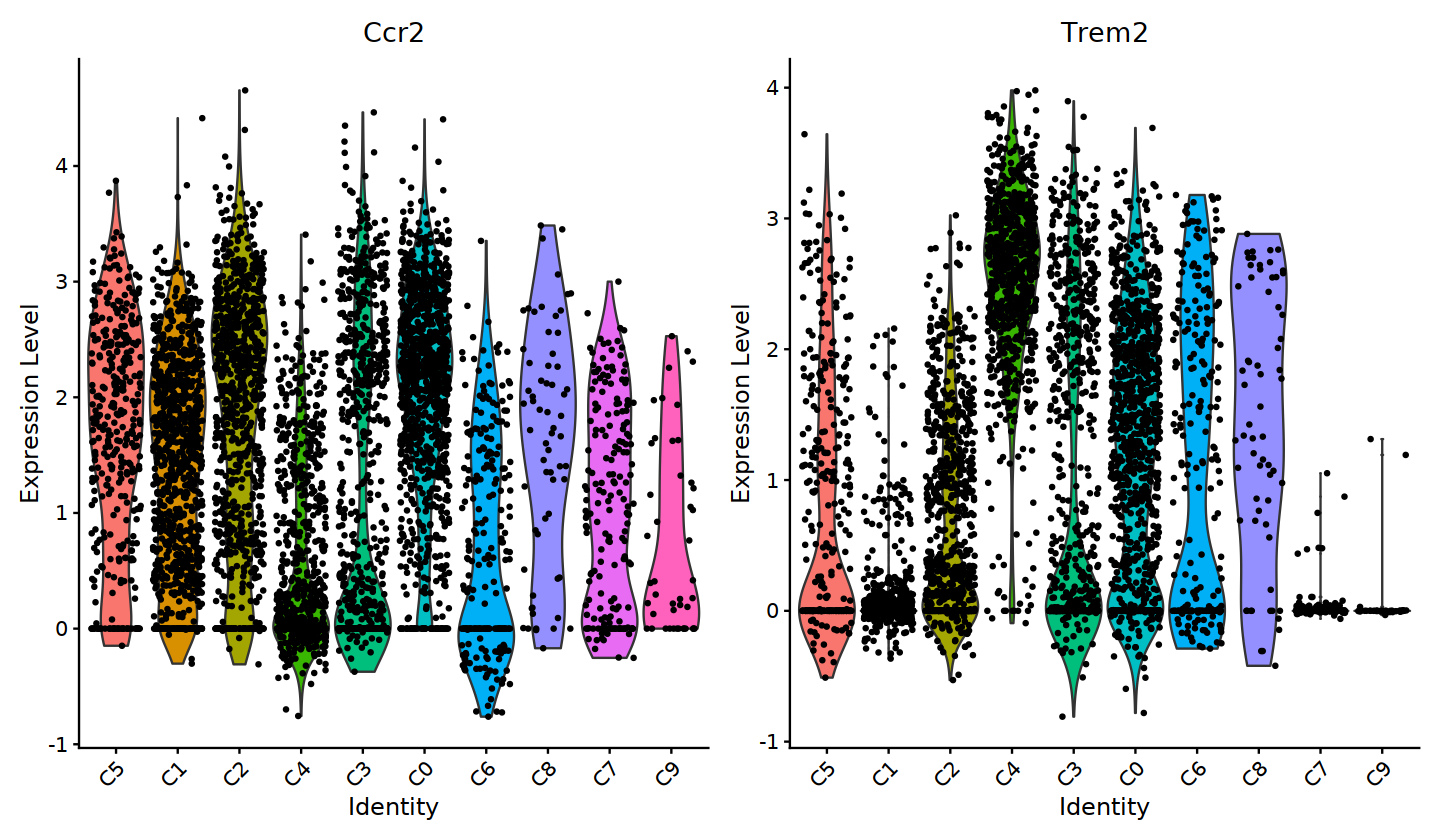

In [31]:
VlnPlot(immune.combined,features = c('Ccr2','Trem2'))

In [32]:
Idents(immune.combined) = 'celltype'

In [33]:
trem2_y = subset(immune.combined,idents = c('C5','C2','C4','C3','C0','C6','C8'))

In [34]:
table(trem2_y$orig.ident)


KO7d MI7d 
1903 2372 

In [102]:
getwd()

[1] "/import/DB/workdir"

In [100]:
trem2_y

An object of class Seurat 
36329 features across 4275 samples within 2 assays 
Active assay: RNA (34329 features, 0 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne

In [103]:
saveRDS(trem2_y,file = 'trem2_y.rds')

In [15]:
trem2_y = readRDS('./trem2_y.rds')

In [16]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [17]:
Idents(trem2_y) = 'orig.ident'

DefaultAssay(trem2_y) = 'RNA'

gene = FindMarkers(trem2_y,`ident.1` = 'KO7d',slot="data", logfc.threshold=0.25, min.pct=0.25, test.use = "wilcox")

siggene = gene %>%  filter(p_val_adj < 0.05)

In [18]:
#DefaultAssay(immune.combined) = 'RNA'

In [19]:
write.csv(siggene,file = 'mac.trem2_yes.sig.gene.csv')

In [20]:
library(dplyr)
library(ggrepel)
library(ggplot2)
library(cowplot)
library(pheatmap)
library(enrichplot)
library(clusterProfiler)
library(org.Mm.eg.db)

Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"
Warning message:
"package 'pheatmap' was built under R version 4.2.3"
Warning message:
"package 'enrichplot' was built under R version 4.2.2"


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata

In [21]:
 gene_symbol <- bitr(geneID = rownames(siggene),  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Mm.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Mm.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE)  

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = rownames(siggene), fromType = "SYMBOL", toType = c("ENTREZID"), :
"4.49% of input gene IDs are fail to map..."


In [22]:
write.csv(BP@result,file = 'trem2_yang_ko_vs_wt.csv')

In [23]:
options(repr.plot.height = 12,repr.plot.width = 9)

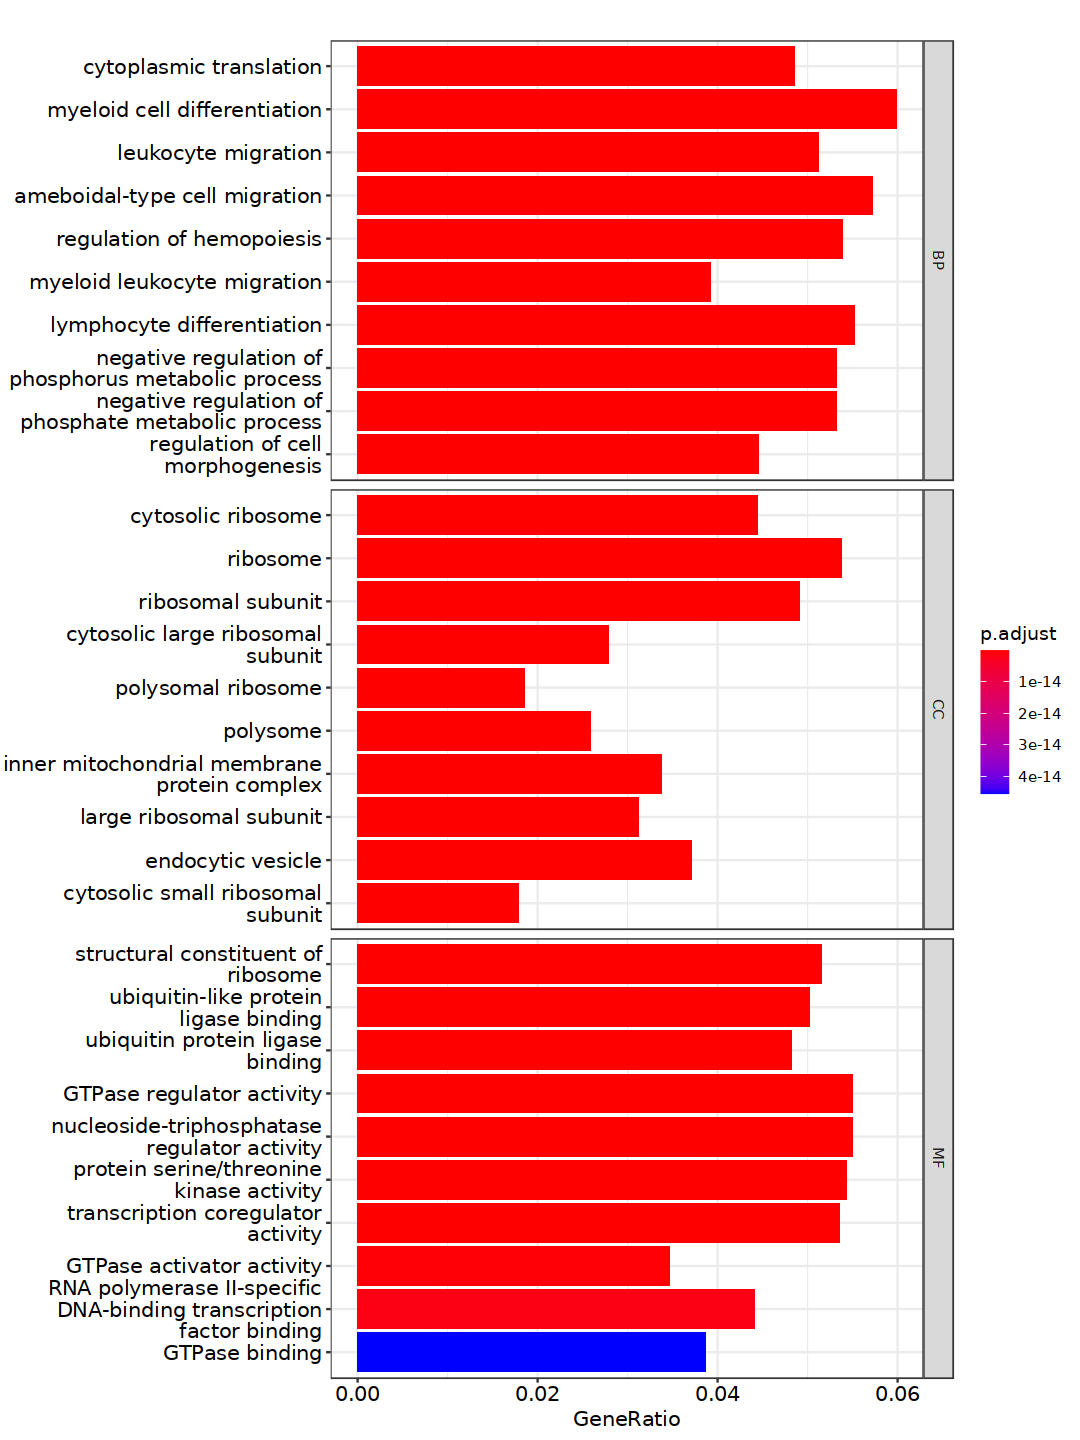

In [24]:
barplot(BP, x = "GeneRatio", color = "p.adjust", #默认参数（x和color可以根据eG里面的内容更改）
        showCategory =10, #只显示前10
        split="ONTOLOGY") + #以ONTOLOGY类型分开
  facet_grid(ONTOLOGY~., scale='free')

In [25]:
ggsave('mac.sig.gene.go.pdf',height = 12,width = 9)

In [26]:
options(repr.plot.height = 9,repr.plot.width = 8)

Reading KEGG annotation online: "https://rest.kegg.jp/link/mmu/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/mmu"...



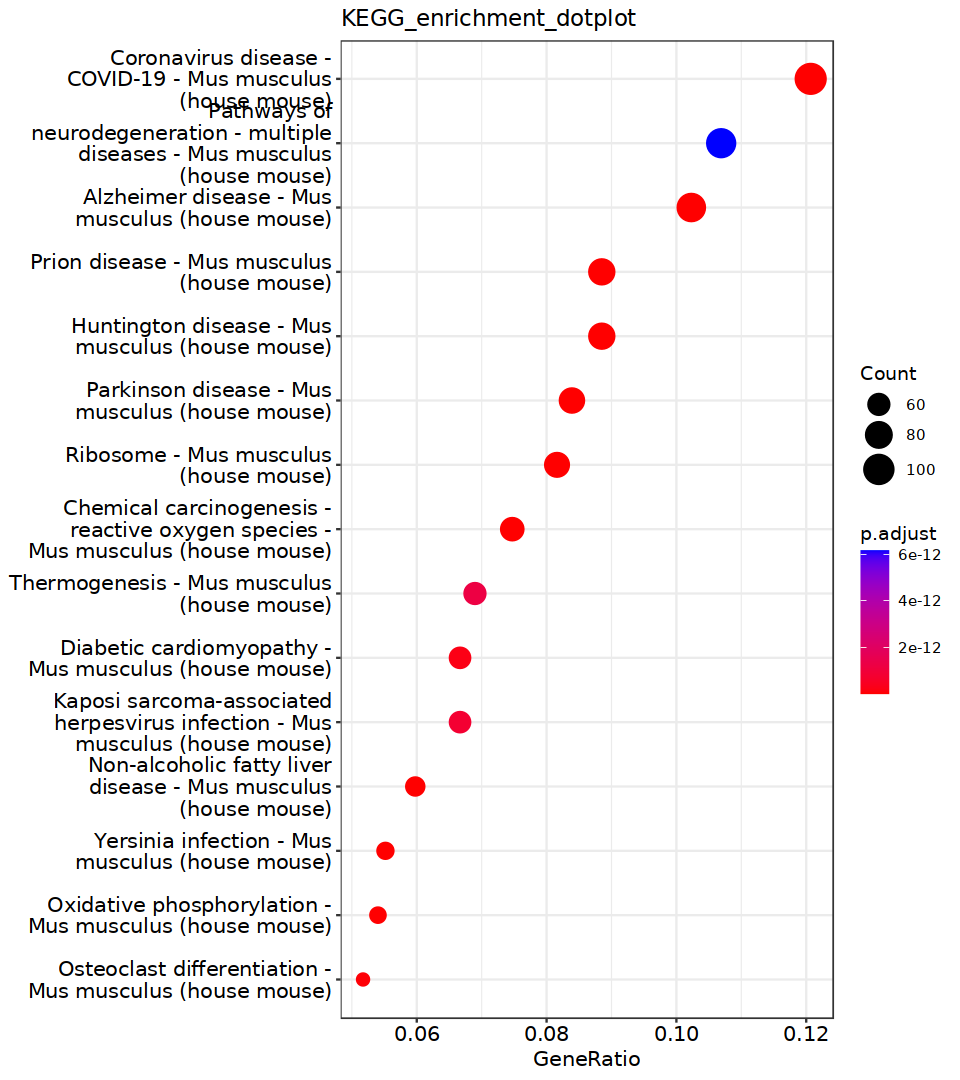

In [27]:
# df <- BP_ego@result
# write.csv(df ,file = 'GO_results.csv')
    ## KEGG
    ek <- enrichKEGG(gene =gene , 
                   organism = "mmu",  
                   pvalueCutoff =0.1, 
                   qvalueCutoff = 0.1) 
    # keggres = ek@result
    # write.csv(keggres,file = 'kegg_results.csv')
    enrichplot::dotplot(ek,  
            x = "GeneRatio", 
            color = "p.adjust", 
            showCategory = 15, 
            size = 'Count', 
            title = "KEGG_enrichment_dotplot"  
            )
    #ggsave('KEGG_enrichment_dotplot.pdf',height = 6,width = 6)
    # KEGG2 <- pairwise_termsim(ek)
    # emapplot(KEGG2, cex_label_category=.8, cex_line=.5,showCategory = 15) + 
    #   ggplot2::scale_fill_continuous(low = "#e06663", high = "#327eba", name = "p.adjust",
    #                         guide = ggplot2::guide_colorbar(reverse = TRUE, order=2.5), trans='log10')
    # ggsave('KEGG_enrichment_net.pdf',height = 8,width = 8) 

In [19]:
ggsave('mac.sig.gene.kegg.pdf',height = 9,width = 8) 

In [20]:
sce = readRDS('./after_rename.rds')

In [21]:
Idents(sce) = 'orig.ident'

In [22]:
DefaultAssay(sce) = 'RNA'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


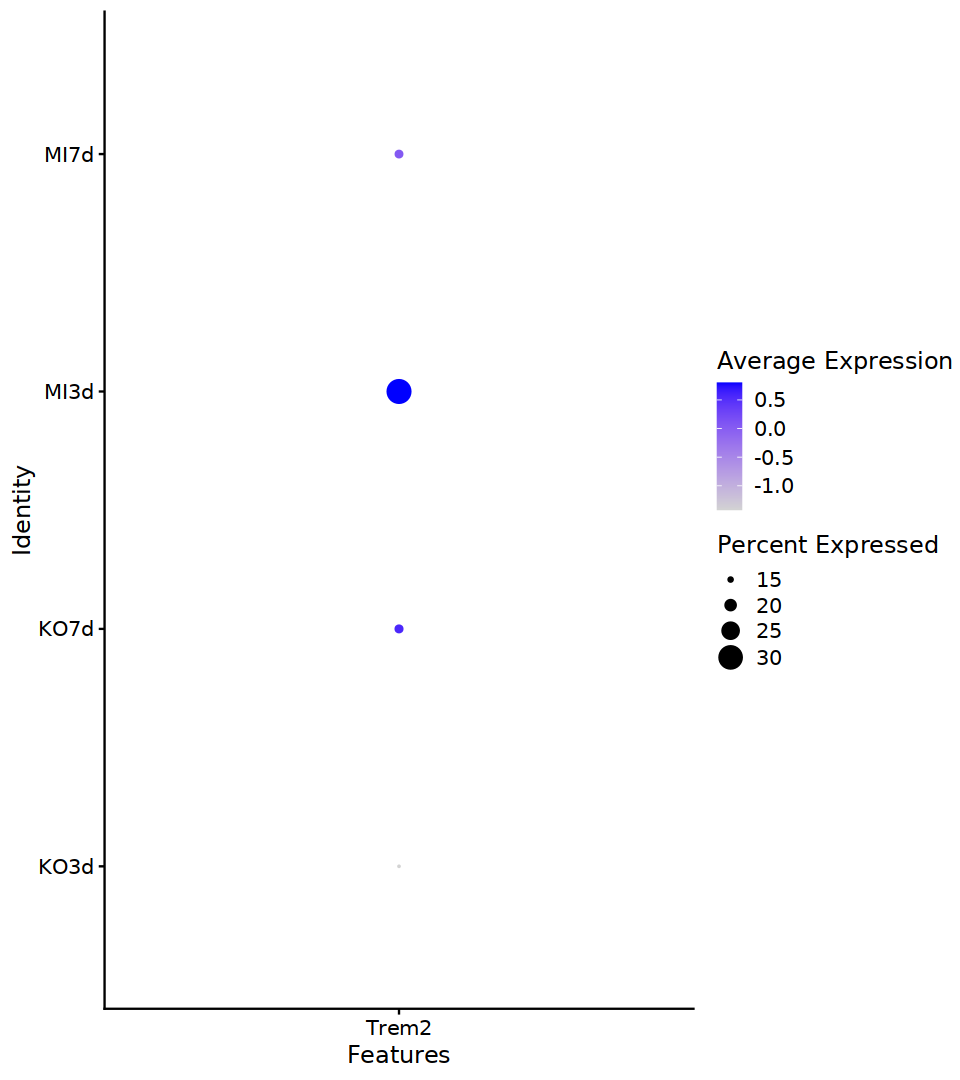

In [23]:
DotPlot(sce,features = 'Trem2')

In [28]:
BP@result['GO:0034341',]

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0034341,BP,GO:0034341,response to interferon-gamma,30/1503,139/28943,2.2518e-11,7.474083e-10,4.248847e-10,Rab43/Dapk1/Ifitm3/Rpl13a/Gapdh/H2-Q7/Vim/Ifitm2/Ccl2/Ccl9/Ciita/Tlr4/Sirpa/Zyx/Ccl6/Vamp8/Actr3/Ccl3/Stx8/Stxbp3/Parp9/Capg/Sp100/Actg1/Stxbp2/Ccl4/Gsn/Slc11a1/H2-Eb1/Mrc1,30


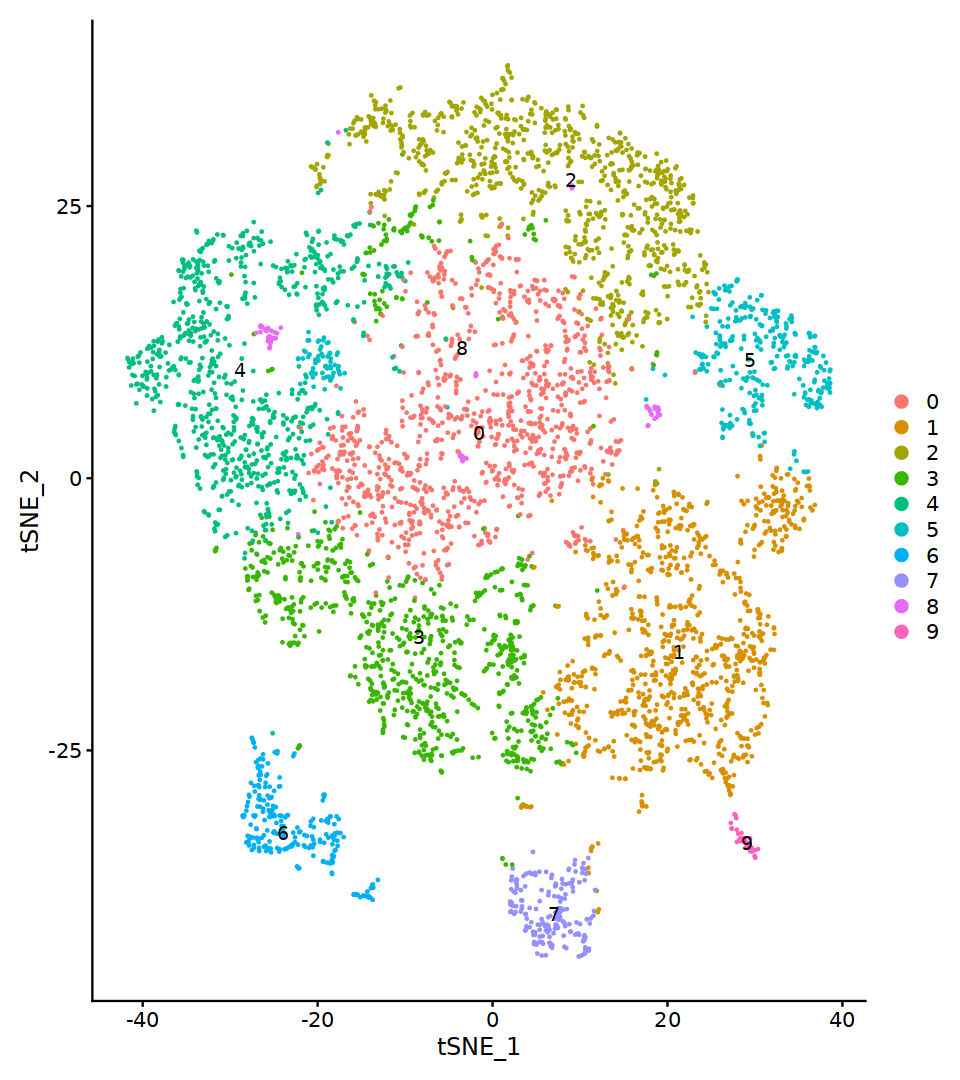

In [76]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [77]:
Idents(immune.combined) = 'orig.ident'

Warning message in FetchData.Seurat(object = object, vars = features, slot = slot):
"The following requested variables were not found: plg"
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
"All cells have the same value of F2."


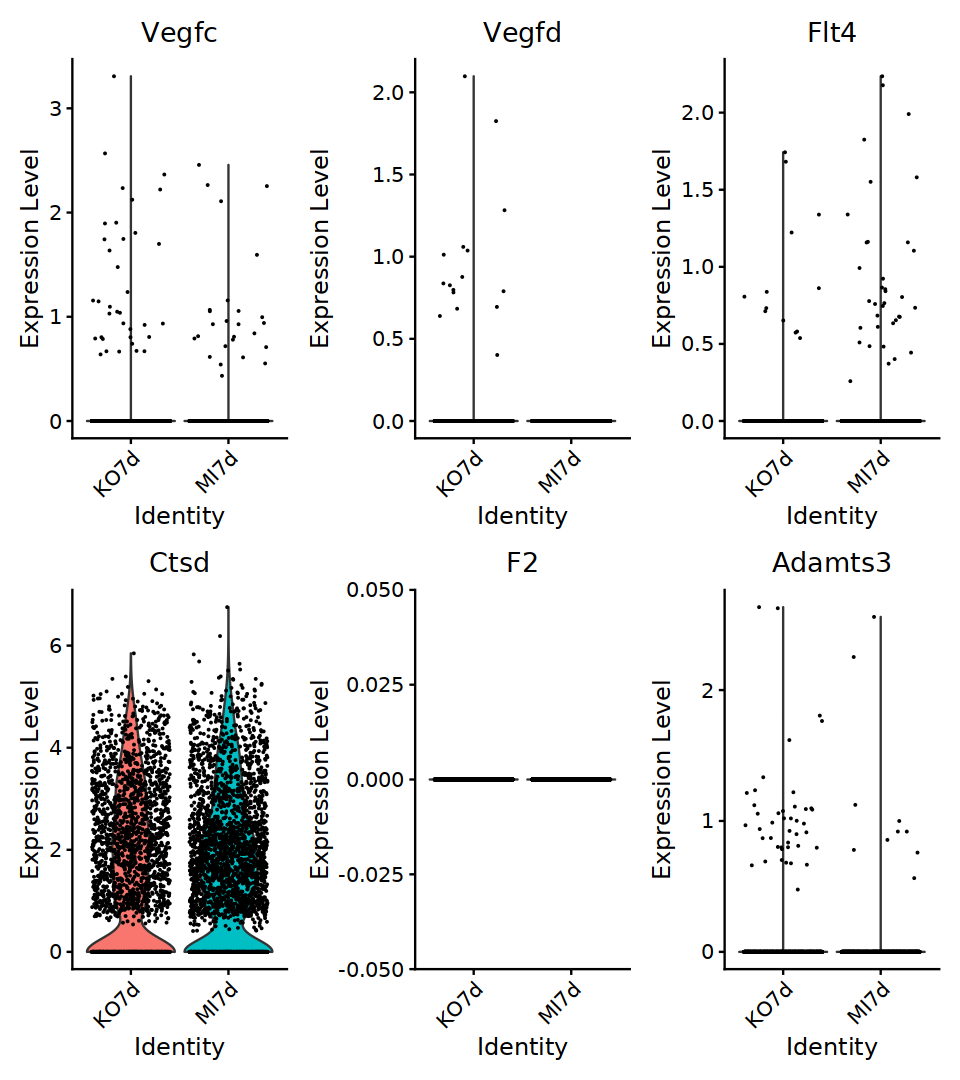

In [104]:
VlnPlot(immune.combined,features = c('Vegfc','Vegfd','Flt4','Ctsd','F2','plg','Adamts3'))

Warning message:
"Scaling data with a low number of groups may produce misleading results"


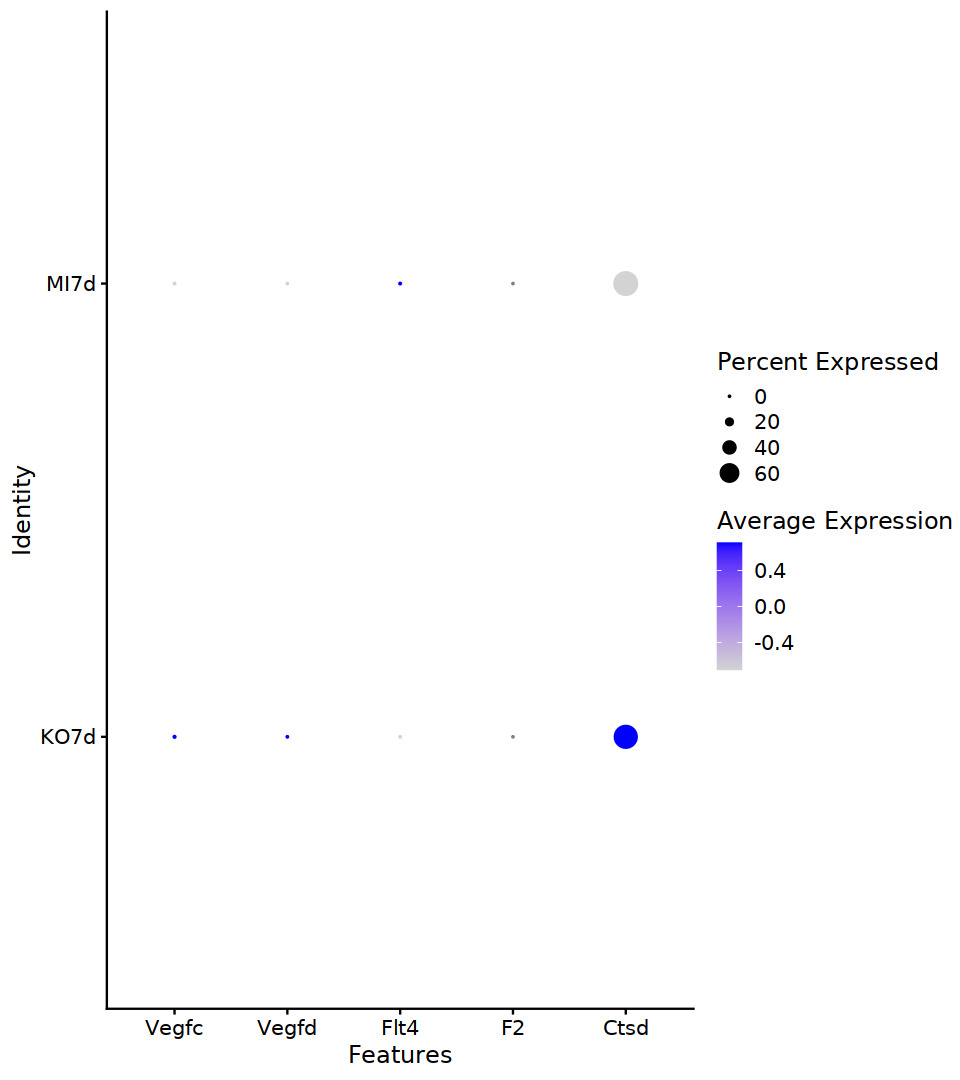

In [95]:
DotPlot(trem2_y,features = c('Vegfc','Vegfd','Flt4','F2','Ctsd'))

In [82]:
Idents(immune.combined) = 'orig.ident'

In [83]:
wt = subset(immune.combined,ident = 'MI7d')

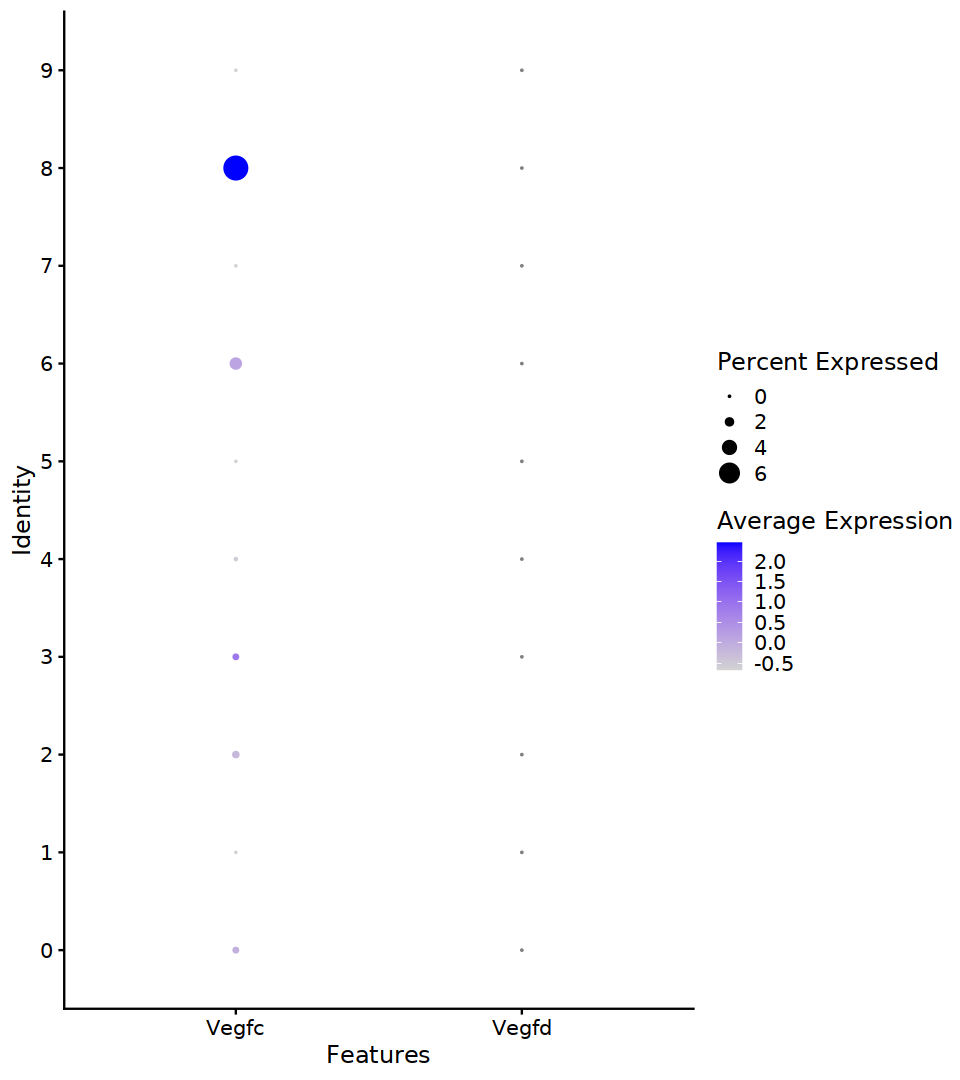

In [91]:
Idents(wt) = 'seurat_clusters'

DotPlot(wt ,features = c('Vegfc','Vegfd','Adamts3',))

In [84]:
ko = subset(immune.combined,ident = 'KO7d')

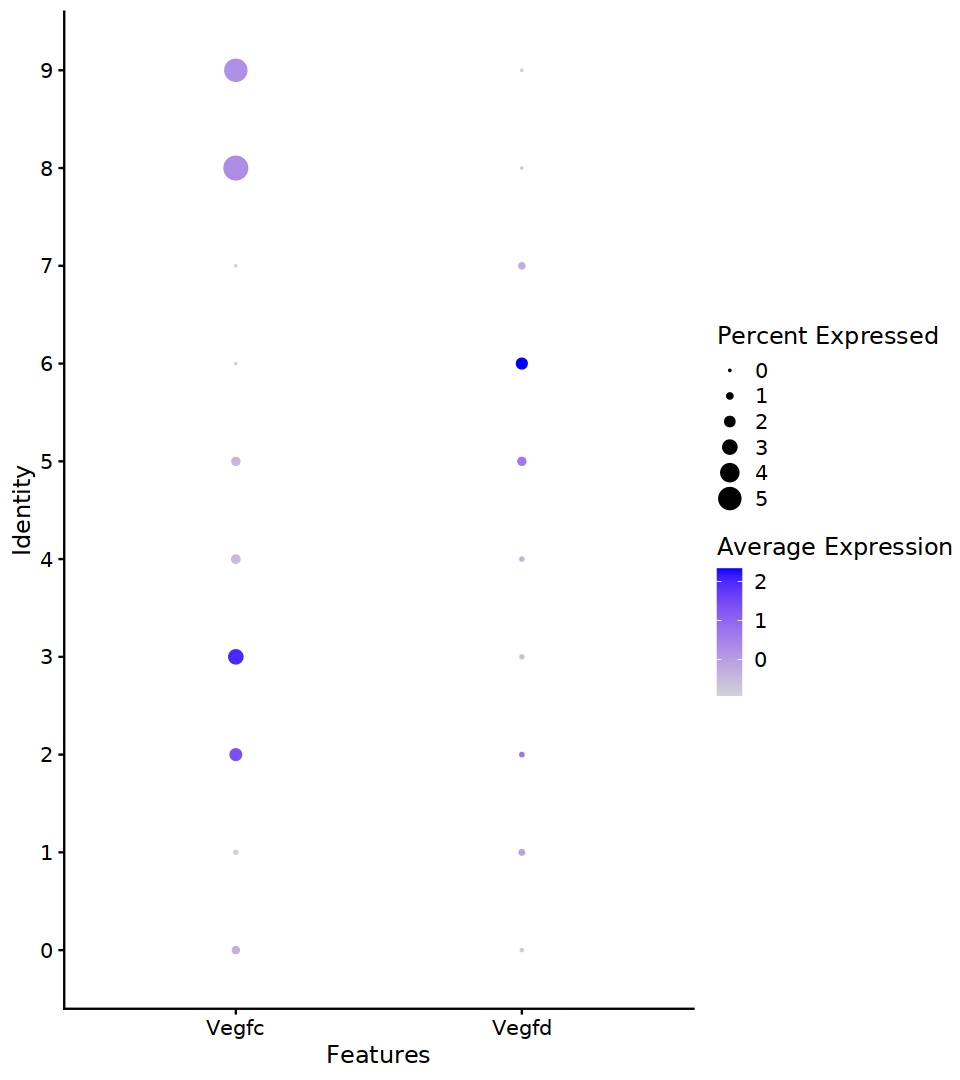

In [92]:
Idents(ko) = 'seurat_clusters'

DotPlot(ko ,features = c('Vegfc','Vegfd'))